In [1]:
import pandas as pd
train = pd.read_csv("C:/Users/joyle/Desktop/chingi/人工智慧/TA-class/Ghouls, Goblins, and Ghosts... Boo/train.csv")
test = pd.read_csv("C:/Users/joyle/Desktop/chingi/人工智慧/TA-class/Ghouls, Goblins, and Ghosts... Boo/test.csv")

In [2]:
#one-hot encoding on color
colors = pd.get_dummies(train['color']).rename(columns=lambda x:'color_' + str(x))
train = pd.concat([train,colors],axis=1)

#將英文轉換為數字
type_to_label = {'Ghost':0 , 'Ghoul':1 , 'Goblin':2}
train['type'] = train['type'].map(type_to_label)

#刪除id跟轉換前的color
train = train.drop(axis=1,labels=['id','color'])

#將type移至最後一行
label = train.pop('type')
train['type'] = label

#one-hot encoding on type
train=pd.get_dummies(train,columns=["type" ])
#print(train)

In [3]:
#提取所需的數據
trainX = train.iloc[:,0:10]
trainY = train.iloc[:,10:13]

In [4]:
#創建model
from keras.models import Sequential
from keras.layers import Dense , Dropout

model = Sequential()
model.add(Dense(units=800, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=500, input_dim=800, kernel_initializer='normal', activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(units=3, kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

train_history = model.fit(x=trainX, y=trainY, validation_split=0.2, epochs=150, batch_size=200, verbose=2) 

loss, accuracy = model.evaluate(trainX, trainY)
print( "\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy* 100 ))

#print(model.summary())

C:\Users\joyle\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 296 samples, validate on 75 samples
Epoch 1/150
 - 0s - loss: 1.1032 - acc: 0.2973 - val_loss: 1.0802 - val_acc: 0.4133
Epoch 2/150
 - 0s - loss: 1.0668 - acc: 0.4730 - val_loss: 1.0618 - val_acc: 0.4267
Epoch 3/150
 - 0s - loss: 1.0543 - acc: 0.4899 - val_loss: 1.0490 - val_acc: 0.4400
Epoch 4/150
 - 0s - loss: 1.0274 - acc: 0.5034 - val_loss: 1.0364 - val_acc: 0.4933
Epoch 5/150
 - 0s - loss: 0.9965 - acc: 0.5676 - val_loss: 1.0206 - val_acc: 0.5467
Epoch 6/150
 - 0s - loss: 0.9818 - acc: 0.5743 - val_loss: 1.0006 - val_acc: 0.5733
Epoch 7/150
 - 0s - loss: 0.9476 - acc: 0.5878 - val_loss: 0.9776 - val_acc: 0.6267
Epoch 8/150
 - 0s - loss: 0.9088 - acc: 0.6250 - val_loss: 0.9508 - val_acc: 0.6533
Epoch 9/150
 - 0s - loss: 0.8838 - acc: 0.6351 - val_loss: 0.9205 - val_acc: 0.6533
Epoch 10/150
 - 0s - loss: 0.8599 - acc: 0.6250 - val_loss: 0.8897 - val_acc: 0.6667
Epoch 11/150
 - 0s - loss: 0.8243 - acc: 0.6385 - val_loss: 0.8602 - val_acc: 0.6533
Epoch 12/150
 - 0s - loss: 0.

Epoch 97/150
 - 0s - loss: 0.4655 - acc: 0.7703 - val_loss: 0.6356 - val_acc: 0.7200
Epoch 98/150
 - 0s - loss: 0.4932 - acc: 0.7736 - val_loss: 0.6208 - val_acc: 0.7067
Epoch 99/150
 - 0s - loss: 0.4821 - acc: 0.7635 - val_loss: 0.6204 - val_acc: 0.7067
Epoch 100/150
 - 0s - loss: 0.4910 - acc: 0.7770 - val_loss: 0.6351 - val_acc: 0.6933
Epoch 101/150
 - 0s - loss: 0.4602 - acc: 0.7736 - val_loss: 0.6540 - val_acc: 0.7200
Epoch 102/150
 - 0s - loss: 0.4748 - acc: 0.7669 - val_loss: 0.6624 - val_acc: 0.7067
Epoch 103/150
 - 0s - loss: 0.4728 - acc: 0.7736 - val_loss: 0.6501 - val_acc: 0.7200
Epoch 104/150
 - 0s - loss: 0.4700 - acc: 0.7601 - val_loss: 0.6338 - val_acc: 0.7067
Epoch 105/150
 - 0s - loss: 0.5094 - acc: 0.7601 - val_loss: 0.6246 - val_acc: 0.7067
Epoch 106/150
 - 0s - loss: 0.4864 - acc: 0.7568 - val_loss: 0.6275 - val_acc: 0.7067
Epoch 107/150
 - 0s - loss: 0.4797 - acc: 0.7500 - val_loss: 0.6355 - val_acc: 0.7067
Epoch 108/150
 - 0s - loss: 0.4816 - acc: 0.7601 - val_lo

In [5]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

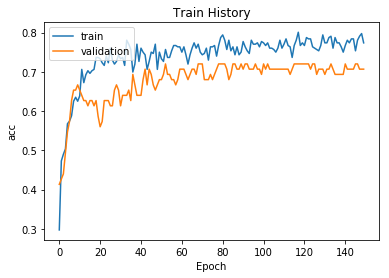

In [6]:
show_train_history(train_history,'acc','val_acc')

In [7]:
#test
#one-hot encoding on color
colors = pd.get_dummies(test['color']).rename(columns=lambda x:'color_' + str(x))
test = pd.concat([test,colors],axis=1)

testX = test.drop(axis=1,labels=['id','color'])
print(testX)

     bone_length  rotting_flesh  hair_length  has_soul  color_black  \
0       0.471774       0.387937     0.706087  0.698537            1   
1       0.427332       0.645024     0.565558  0.451462            0   
2       0.549602       0.491931     0.660387  0.449809            1   
3       0.638095       0.682867     0.471409  0.356924            0   
4       0.361762       0.583997     0.377256  0.276364            1   
5       0.292890       0.505851     0.297927  0.106263            0   
6       0.584456       0.551680     0.628330  0.499118            0   
7       0.485525       0.459242     0.657735  0.565337            0   
8       0.471757       0.407916     0.465992  0.406608            0   
9       0.572953       0.316454     0.668388  0.640692            0   
10      0.320542       0.561671     0.340446  0.338964            0   
11      0.413702       0.563031     0.822650  0.525445            0   
12      0.135615       0.513499     0.590764  0.549240            0   
13    

In [24]:
#預測test的值
testY = model.predict_classes(testX)

testY = pd.DataFrame(testY,columns=['type'])

print(testY)

     type
0       1
1       2
2       1
3       0
4       0
5       0
6       1
7       1
8       2
9       1
10      0
11      1
12      2
13      0
14      1
15      0
16      1
17      0
18      0
19      1
20      1
21      1
22      2
23      2
24      2
25      2
26      1
27      2
28      1
29      1
..    ...
499     0
500     2
501     0
502     0
503     2
504     1
505     2
506     1
507     0
508     1
509     2
510     2
511     1
512     0
513     0
514     1
515     1
516     2
517     2
518     2
519     0
520     1
521     1
522     1
523     1
524     2
525     0
526     1
527     0
528     0

[529 rows x 1 columns]


In [25]:
#將id提出來
idx = test.iloc[:,0]

#將0,1,2分別轉換為他們所對應的英文字
labelY = {0:'Ghost', 1:'Ghoul', 2:'Goblin'}
testY['type'] = testY['type'].map(labelY)

#將id與type組合
df=pd.concat([idx,testY],axis=1)
df

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Ghost
4,13,Ghost
5,14,Ghost
6,15,Ghoul
7,16,Ghoul
8,17,Goblin
9,18,Ghoul


In [566]:
#將dataframe儲存為csv檔
df.to_csv('sample_submission.csv',index=False,header = True)

In [567]:
#import csv 
#csvFile = open('sample_submission.csv','w+')
#try:
 #   writer = csv.writer(csvFile)
  #  writer.writerow(('id','type'))
   # for i in range(len(x)):
    #    writer.writerow(x)
#finally:
 #   csvFile.close()
df = pd.read_csv('sample_submission.csv')
df

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Ghost
4,13,Ghost
5,14,Ghost
6,15,Ghoul
7,16,Goblin
8,17,Goblin
9,18,Ghoul
